## Housing Price Prediction Project ##

Author: Happiness Ehimatie Isere

Dataset: house_data.csv

This notebook explores the Housing dataset using regression models to predict house prices. The workflow includes:

 - Exploratory Data Analysis (EDA)
 - Regression modeling (single feature)
 - Model evaluation
 - Interpretation and reflection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

## Data Loading

In [3]:
df = pd.read_csv("/Users/thewifewiththekingmakersanointing/Desktop/project practical/house_data.csv")

df.shape, df.head()

((1460, 82),
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
 0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
 1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
 2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
 3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
 4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   
 
   SaleType  SaleCondition  SalePrice  SalePrice Cate

## Exploratory Data Analysis (EDA)

In [4]:
# Check dataset info
df.info()

# Summary statistics
df.describe()

# Missing values
df.isnull().sum().head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1460 non-null   int64  
 1   MSSubClass          1460 non-null   int64  
 2   MSZoning            1460 non-null   object 
 3   LotFrontage         1201 non-null   float64
 4   LotArea             1460 non-null   int64  
 5   Street              1460 non-null   object 
 6   Alley               91 non-null     object 
 7   LotShape            1460 non-null   object 
 8   LandContour         1460 non-null   object 
 9   Utilities           1460 non-null   object 
 10  LotConfig           1460 non-null   object 
 11  LandSlope           1460 non-null   object 
 12  Neighborhood        1460 non-null   object 
 13  Condition1          1460 non-null   object 
 14  Condition2          1460 non-null   object 
 15  BldgType            1460 non-null   object 
 16  HouseS

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
dtype: int64

# Distribution of SalePrice

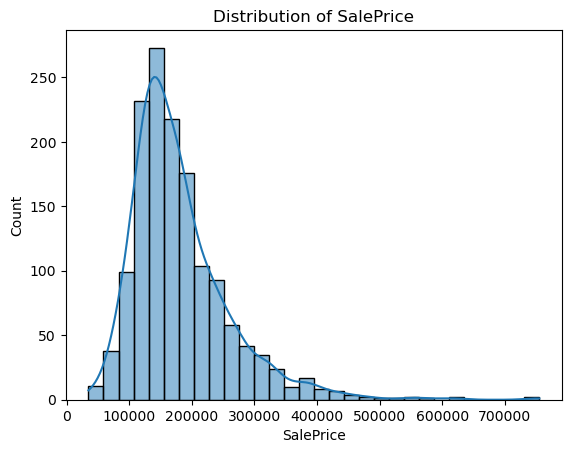

In [5]:
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title("Distribution of SalePrice")
plt.show()

# Using heatmap to show the top 10 features correlated with SalePrice

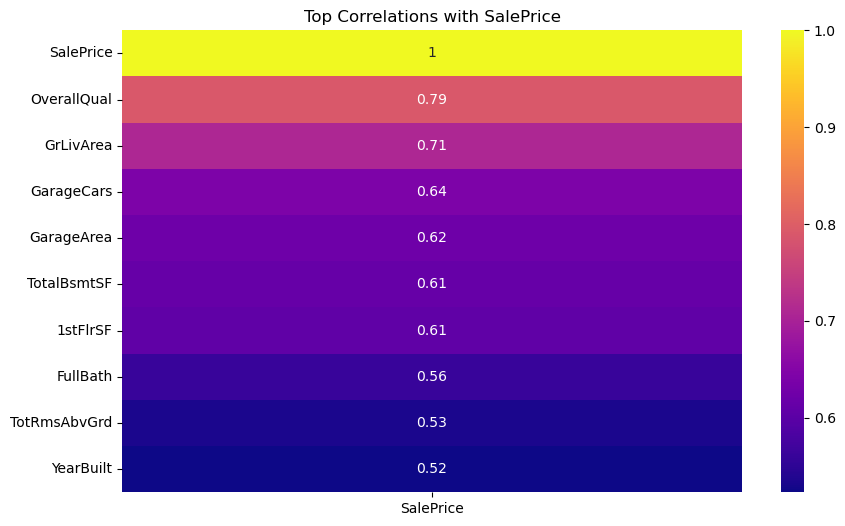

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True)[['SalePrice']].sort_values(by='SalePrice', ascending=False).head(10), annot=True, cmap="plasma")
plt.title("Top Correlations with SalePrice")
plt.show()

In [7]:
X_single = df[['OverallQual']]
y = df['SalePrice']

model_single = LinearRegression()
model_single.fit(X_single, y)
y_pred_single = model_single.predict(X_single)

## Metrics

In [8]:
print("R² Score:", r2_score(y, y_pred_single))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_single)))

R² Score: 0.6256518924621182
RMSE: 48589.44712143806


## Visualization

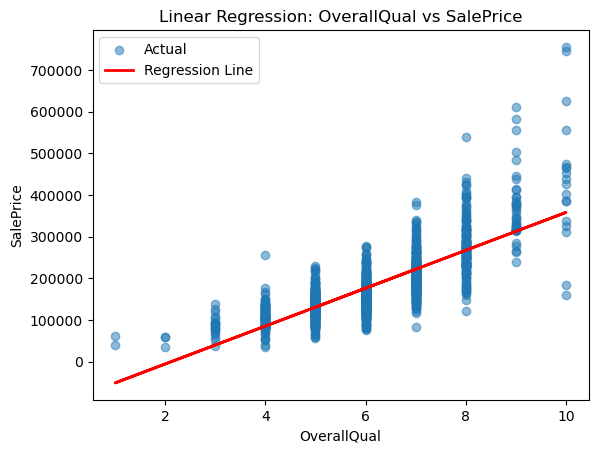

In [9]:
plt.scatter(X_single, y, alpha=0.5, label="Actual")
plt.plot(X_single, y_pred_single, color='red', linewidth=2, label="Regression Line")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("Linear Regression: OverallQual vs SalePrice")
plt.legend()
plt.show()

## Residuals (errors) for the Single-Feature model

In linear regression, we assume that the residuals are normally distributed (a bell-shaped curve) around zero.
This plot helps us check if that assumption is met. If the residuals are roughly symmetric around zero and look like a bell curve, then our model's errors are random and we've captured the underlying relationship well.
If the plot is skewed or has a pattern, it might indicate a problem with the model.

In summary, this code is checking the distribution of the prediction errors (residuals) for the single-feature model.

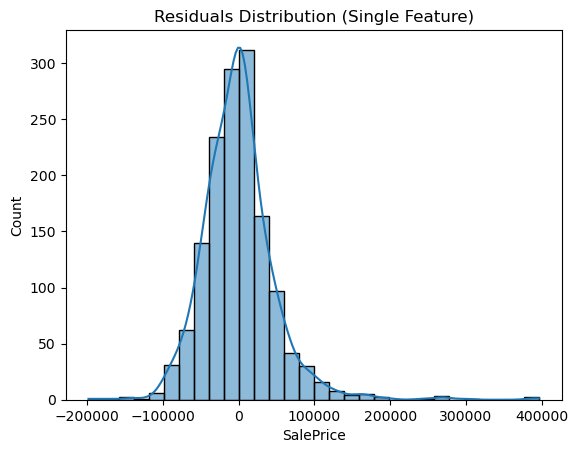

In [10]:
residuals_single = y - y_pred_single
sns.histplot(residuals_single, bins=30, kde=True)
plt.title("Residuals Distribution (Single Feature)")
plt.show()

## Interpretation of Results

 - The scatterplot and regression line show a clear positive relationship: as OverallQual increases, SalePrice also increases.
 - The R² score indicates how much of the variation in house prices is explained by quality alone. Typically, this value will be moderate (0.6 range), meaning quality is important but not the only factor.
 - The residual plot shows that predictions are not perfect: prices can vary widely within the same quality score. This suggests that other features also strongly influence price.


Interpretation: House quality is a strong indicator of price, but a single feature cannot fully capture the complexity of housing markets.

 ## Document of a short reflection paragraph on my observations and findings.

https://docs.google.com/document/d/1qy5bmNtYFbT_2wq_H8I-VpXAGhFJM8kj5WWvvrFezBQ/edit?usp=sharing